### Import libraries 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Customize 

In [25]:
# Machine parameters
capital_cost_A = 500000
capital_cost_B = 600000
extra_capital_cost = capital_cost_B - capital_cost_A  # $100,000 extra for Machine B

# Fuel cost parameters
baseline_fossil_price = 100  # baseline fossil fuel price per unit
natural_gas_price = 90       # cost per unit when switching to natural gas
usage = 10000                # annual fuel usage in units

# Parameters for increase (>20%) of price of fossil fuel 
prob_high_price = 0.4
lowest_increase= 1.2
highest_increase= 1.5
number_of_cases = 5

#file names to save results
csv_filename = "0705 option_values.csv"
plot_image='0705 real_option_value.png'

### Setup for scenario analysis

In [27]:
# Define a range of fossil fuel price increase factors (from a 20% to a 40% rise)
# e.g., 1.20, 1.25, 1.30, 1.35, 1.40
price_increase_factors = np.round(np.linspace(lowest_increase, highest_increase, number_of_cases), 2)

# Store the calculated option values for each scenario
option_values = []

### Compute and display results 

In [29]:
print("Scenario Analysis for Fuel Price Increases:")
for factor in price_increase_factors:
    # Calculate the new fossil fuel price
    new_fossil_price = baseline_fossil_price * factor
    
    # Operating cost for Machine A under the high fuel price scenario
    cost_A = new_fossil_price * usage
    
    # Operating cost for Machine B if it switches to natural gas
    cost_B = natural_gas_price * usage
    
    # Operating savings when switching from fossil fuel to natural gas
    operating_savings = cost_A - cost_B
    
    # Net benefit from having the switch option (savings minus extra capital cost)
    net_benefit = operating_savings - extra_capital_cost
    
    # Expected benefit (option value) considering the 40% chance of the high price scenario
    expected_benefit = round(prob_high_price * max(net_benefit, 0), 2)
    
    option_values.append(expected_benefit)

Scenario Analysis for Fuel Price Increases:


### Save results in a file

In [31]:
# save in a csv
# Ensure option_values and price_increase_factors have the same length
df = pd.DataFrame({
    "Fuel Price Factor": price_increase_factors[:len(option_values)],  # Trim to match length
    "Expected Option Value ($)": option_values
})

# Save results to a CSV file
df.to_csv(csv_filename, index=False)
print(f"Results saved to {csv_filename}")

Results saved to 0705 option_values.csv


### Display results and save plot 


Option Value Table:

   Fuel Price Factor  Expected Option Value ($)
0               1.20                    80000.0
1               1.27                   108000.0
2               1.35                   140000.0
3               1.42                   168000.0
4               1.50                   200000.0
Plot saved 0705 real_option_value.png


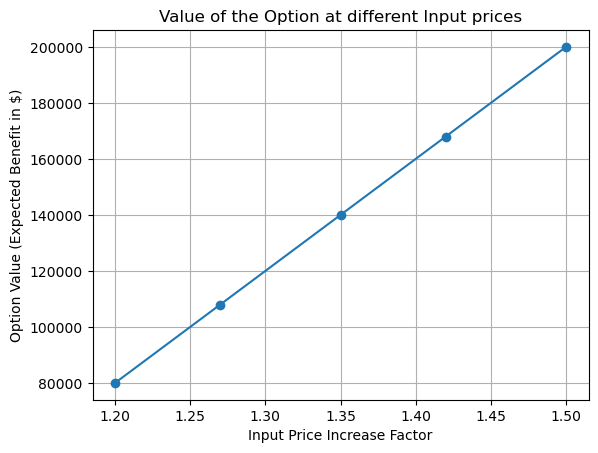

In [33]:
# Display the DataFrame on screen
print("\nOption Value Table:\n")
print(df)

# Plotting the option value versus fossil fuel price increase factors
plt.plot(price_increase_factors, option_values, marker='o', linestyle='-')
plt.xlabel("Input Price Increase Factor")
plt.ylabel("Option Value (Expected Benefit in $)")
plt.title("Value of the Option at different Input prices")
plt.grid(True)

# Save plot as an image file
plt.savefig(plot_image, dpi=300)
print(f"Plot saved {plot_image}")
plt.show()
